[Reference](https://medium.com/swlh/detecting-fake-news-with-python-and-machine-learning-f78421d29a06) <br>
[Text Classification](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)



In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 3 08:06:15 2020

@author: Sangyun
"""

'\nCreated on Thu Sep 3 08:06:15 2020\n\n@author: Sangyun\n'

![WorkFlow](https://miro.medium.com/max/1400/1*6ku25gAB-_SLtxVNyBkl9w.jpeg)

In [ ]:
import re
import string

import numpy as np 
import pandas as pd
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from nltk.corpus import stopwords
import nltk
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-plot
import scikitplot as skplt
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#import methods
from sklearn.naive_bayes import MultinomialNB 
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.neural_network import MLPClassifier
#from xgboost import XGBClassifier

import itertools
import pandas as pd
import numpy as np
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from itertools import islice
import logging
import gensim
from gensim.models import Word2Vec

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
!pwd
os.chdir('gdrive/My Drive/Colab Notebooks/')
!pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
/content
/content/gdrive/My Drive/Colab Notebooks


In [ ]:
df = pd.read_csv("review_complexity.csv", encoding = 'latin-1')

In [ ]:
# DROP DUPLICATES
df.drop_duplicates(subset=['text'], keep='first',inplace=True)
df.shape

(358081, 9)

In [ ]:
# "-1" label: Fake / "1" label: Real
df.head(10)

,user_id,prod_id,date,text,rating,label,length,words,complexity
0,923,0,2014-12-08,The food at snack is a selection of popular Gr...,3.0,-1,40.0,"['the', 'food', 'at', 'snack', 'be', 'a', 'sel...",30.0
1,924,0,2013-05-16,This little place in Soho is wonderful. I had ...,3.0,-1,52.0,"['this', 'little', 'place', 'in', 'soho', 'be'...",41.0
2,925,0,2013-07-01,ordered lunch for 15 from Snack last Friday. Â...,4.0,-1,32.0,"['order', 'lunch', 'for', 'from', 'snack', 'la...",29.0
3,926,0,2011-07-28,This is a beautiful quaint little restaurant o...,4.0,-1,90.0,"['this', 'be', 'a', 'beautiful', 'quaint', 'li...",63.0
4,927,0,2010-11-01,Snack is great place for a Â casual sit down l...,4.0,-1,102.0,"['snack', 'be', 'great', 'place', 'for', 'a', ...",81.0
5,928,0,2009-09-02,A solid 4 stars for this greek food spot. Â If...,4.0,-1,41.0,"['a', 'solid', 'star', 'for', 'this', 'greek',...",34.0
6,929,0,2009-08-25,Let me start with a shout-out to everyone who ...,4.0,-1,133.0,"['let', 'me', 'start', 'with', 'a', 'shout', '...",98.0
7,930,0,2007-05-20,Love this place! Â Try the Chicken sandwich or...,4.0,-1,22.0,"['love', 'this', 'place', 'try', 'the', 'chick...",19.0
8,931,0,2005-12-27,My friend and I were intrigued by the nightly ...,4.0,-1,104.0,"['my', 'friend', 'and', 'i', 'be', 'intrigue',...",68.0
9,932,0,2014-05-09,Stopped in for lunch today and couldn't believ...,5.0,-1,45.0,"['stop', 'in', 'for', 'lunch', 'today', 'and',...",41.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358081 entries, 0 to 358957
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     358081 non-null  int64  
 1   prod_id     358081 non-null  int64  
 2   date        358081 non-null  object 
 3   text        358080 non-null  object 
 4   rating      358081 non-null  float64
 5   label       358081 non-null  int64  
 6   length      358080 non-null  float64
 7   words       358080 non-null  object 
 8   complexity  358080 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 27.3+ MB


In [ ]:
df.shape

(358081, 9)

In [ ]:
# df = df[:10000]
# df.reset_index(inplace=True)

In [ ]:
STOPWORDS = stopwords.words('english')
STOPWORDS.extend(['rt', 'http']) # extend stopwords; rt means re-tweet
STOPWORDS = set(STOPWORDS)

In [ ]:
def tokenization(text):
    text = str(text)
    word = text.split()
    return word
df['text'] = df['text'].apply(tokenization)

In [ ]:
def lowercase(word):
    new_word = list()
    for i in word:
        i = i.lower()
        new_word.append(i)
    return new_word
df['text'] = df['text'].apply(lowercase)

In [ ]:
import string as s

def remove_punctuations(word):
    new_word = list() 
    for i in word:
        for j in s.punctuation:
            i = i.replace(j,'')
        new_word.append(i)
    return new_word
df['text'] = df['text'].apply(remove_punctuations)

In [ ]:
def remove_stopwords(word):
    # to_remove = ['but','no', 'not','isn']
    # stop_words_ = set(stopwords.words('english')).difference(to_remove)
    stop_words_ = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're",
                 "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he',
                 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's",
                 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
                 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was',
                 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
                 'a', 'an', 'the', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by',
                 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above',
                 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',
                 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',
                 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than',
                 'too', 'very', 's', 't', 'can', 'will', 'just', 'should', "should've", 'now', 'd', 'll', 'm',
                 'o', 're', 've', 'y']
    new_word = list()
    for i in word:
        if i not in stop_words_:
            new_word.append(i)
    return new_word

df['text'] = df['text'].apply(remove_stopwords)

In [ ]:
def remove_numbers(word):
    no_num_word = list()
    new_word = list()
    for i in word:
        for j in s.digits:    
            i = i.replace(j,'')
        no_num_word.append(i)
    for i in no_num_word:
        if i!='':
            new_word.append(i)
    return new_word
df['text'] = df['text'].apply(remove_numbers)

In [ ]:
def remove_spaces(word):
    new_word = list()
    for i in word:
        i = i.strip()
        new_word.append(i)
    return new_word
df['text'] = df['text'].apply(remove_spaces)

In [ ]:
df['text'] = df['text'].apply(lambda x: ''.join(i+' ' for i in x))

In [ ]:
# change these to periods (nltk tokenizer uses periods to tokenize)
# and we really want to tokenize the hell out of the text
contra_words = ['however ','but ','although','nevertheless']
df['text'] = df['text'].str.replace('|'.join(contra_words), '. ')
# remove the words associated for when google translated a review
translated_terms = ['(translated google)', '(original)',
                    'translated by google''translate by google']
df['text'] = df['text'].str.replace('|'.join(translated_terms), ' ')

In [ ]:
# replace punctuation with period
df['text'] = df['text'].apply(lambda x: re.sub('[^\w\s]', '. ', x))

In [ ]:
# remove more than one space
df.text = df.text.replace('\s+', ' ', regex=True)

In [ ]:
# remove all single characters
df['text'] = df['text'].apply(lambda x: re.sub(r'\s+[a-zA-Z]\s+', ' ', x))

In [ ]:
# remove non ascii (non english words)
def remove_non_ascii(text):
    return ''.join([i if ord(i) < 128 else ' ' for i in text])
df['text'] = df['text'].apply(remove_non_ascii)

In [ ]:
def tokenize_eng_text(col):
   col = nltk.sent_tokenize(col)
   # col = ' '.join(col)
  #  print(col)
   return col
df['text'] = df['text'].apply(tokenize_eng_text)
# now remove periods (nltk tokenizes with periods)
df['text'] = df['text'].apply(lambda x: [y.replace('.', '') for y in x])

In [ ]:
# explode dataframe using tokenized list
# create df to explode
df.reset_index(drop=True,inplace=True)
df['extra_id'] = df.index
dfe = df[['extra_id','text']]
print('exploding text')
dfe = dfe.explode('text')
print(dfe)
# clean up for outputting
# before merging - erase text columns on df
del df['text']
# join exploded df to original data
df = pd.merge(dfe, df, how='left', on='extra_id')

exploding text
        extra_id                                               text
0              0  food snack selection popular greek dishes appe...
1              1  little place soho wonderful lamb sandwich and ...
1              1            then soho staff little snotty and rude 
1              1          food great dont expect worldclass service
2              2  ordered lunch snack last friday   time nothing...
...          ...                                                ...
358079    358079  appreciate good thin chewy crust love emily sa...
358079    358079  even without getting know must get smores calz...
358079    358079  one among best and great friendly service welc...
358079    358079  atmosphere and service really elevated experie...
358080    358080                                                nan

[811159 rows x 2 columns]


In [ ]:
# remove more than one space
dfe.text = dfe.text.replace('\s+', ' ', regex=True)
dfe = dfe[~pd.isnull(dfe['text'])]

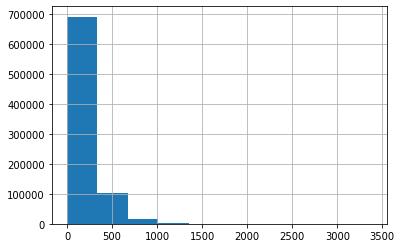

In [ ]:
df['text'].str.len().hist()

In [ ]:
df = df[pd.notnull(df['text'])]
df = df[df['text'].str.len() < 90]
df = df[df['text'].str.len() > 3]

In [ ]:
df.head()

,extra_id,text,user_id,prod_id,date,rating,label,length,words,complexity
1,1,little place soho wonderful lamb sandwich and ...,924,0,2013-05-16,3.0,-1,52.0,"['this', 'little', 'place', 'in', 'soho', 'be'...",41.0
2,1,then soho staff little snotty and rude,924,0,2013-05-16,3.0,-1,52.0,"['this', 'little', 'place', 'in', 'soho', 'be'...",41.0
3,1,food great dont expect worldclass service,924,0,2013-05-16,3.0,-1,52.0,"['this', 'little', 'place', 'in', 'soho', 'be'...",41.0
12,8,tiny able stand waited and glass wine narrow b...,931,0,2005-12-27,4.0,-1,104.0,"['my', 'friend', 'and', 'i', 'be', 'intrigue',...",68.0
14,8,cinnamon overpowered flavors friend stuffed to...,931,0,2005-12-27,4.0,-1,104.0,"['my', 'friend', 'and', 'i', 'be', 'intrigue',...",68.0


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.drop(['index','extra_id','words'],axis=1, inplace=True)

In [ ]:
df.head()

,text,user_id,prod_id,date,rating,label,length,complexity
0,little place soho wonderful lamb sandwich and ...,924,0,2013-05-16,3.0,-1,52.0,41.0
1,then soho staff little snotty and rude,924,0,2013-05-16,3.0,-1,52.0,41.0
2,food great dont expect worldclass service,924,0,2013-05-16,3.0,-1,52.0,41.0
3,tiny able stand waited and glass wine narrow b...,931,0,2005-12-27,4.0,-1,104.0,68.0
4,cinnamon overpowered flavors friend stuffed to...,931,0,2005-12-27,4.0,-1,104.0,68.0


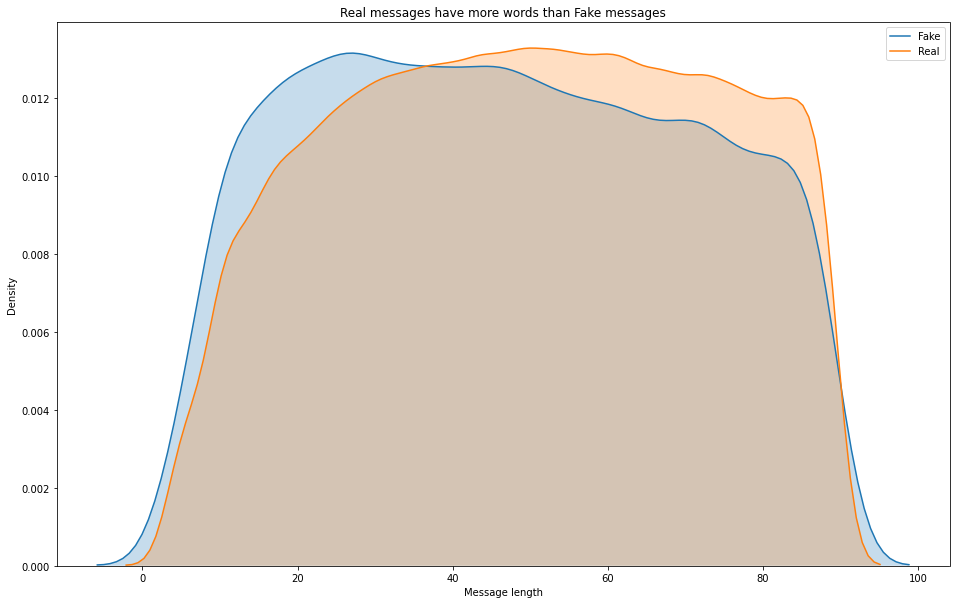

In [ ]:
df["num_words"] = df["text"].apply(lambda s: len(re.findall(r'\w+', s))) # Count the number of words in the message
df["message_len"] = df["text"].apply(len) # get the length of the text message

f,ax = plt.subplots(figsize=(16,10))
sns.kdeplot(df.loc[df.label == -1, "message_len"], shade=True, label="Fake")
sns.kdeplot(df.loc[df.label == 1, "message_len"], shade=True, label="Real", clip=(0, 250)) ## removing observations with message length above 250 because there is an outlier
ax.set(xlabel = "Message length", ylabel = "Density",title = "Real messages have more words than Fake messages")
plt.show()

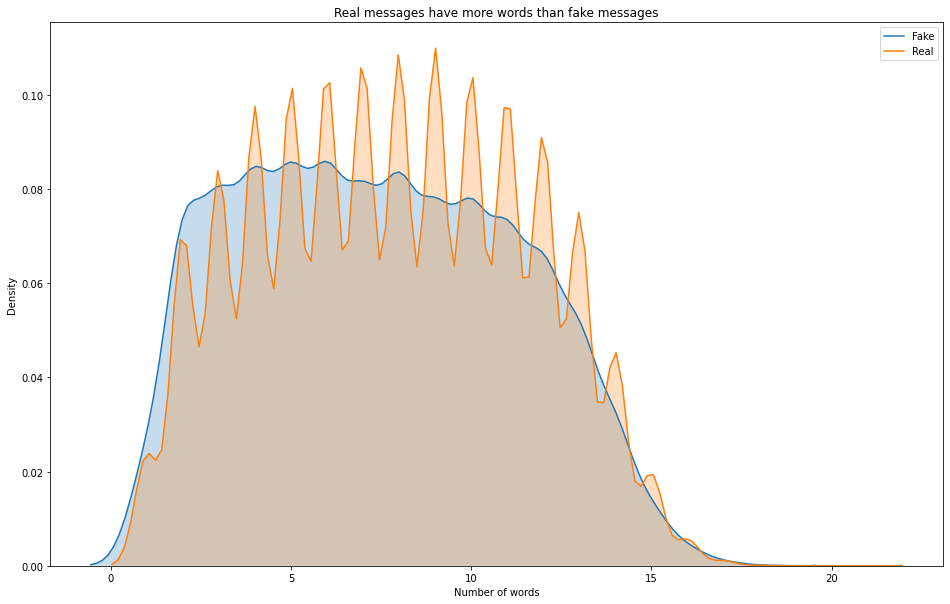

In [ ]:
f,ax = plt.subplots(figsize=(16,10))
sns.kdeplot(df.loc[df.label == -1, "num_words"], shade=True, label="Fake")
sns.kdeplot(df.loc[df.label == 1, "num_words"], shade=True, label="Real", clip=(0, 35)) # removing observations with message length above 35 because there is an outlier
ax.set(xlabel = "Number of words", ylabel = "Density",title = "Real messages have more words than fake messages")
plt.show()

In [ ]:
# Change the labels
df.loc[(df['label'] == -1) , ['label']] = 'FAKE'
df.loc[(df['label'] == 1) , ['label']] = 'REAL'

In [ ]:
# Isolate the labels
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    FAKE
3    FAKE
4    FAKE
Name: label, dtype: object

In [ ]:
df.label.value_counts()

REAL    248134
FAKE     26009
Name: label, dtype: int64

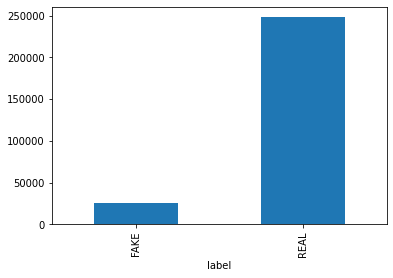

In [ ]:
df.groupby('label').text.count().plot.bar(ylim=0)
plt.show()

# make equal number of each label
[Reference1](https://elitedatascience.com/imbalanced-classes) <br>
[Reference2](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)

![unbalanced](https://cdn-images-1.medium.com/max/1000/1*P93SeDGPGw0MhwvCcvVcXA.png)

There are also other methods such as Create Synthetic Samples (Data Augmentation), Combine Minority Classes, and Reframe as Anomaly Detection.

We can penalize Algorithms (Cost-Sensitive Training)

Here is an example below.
```python
clf_3 = SVC(kernel='linear', 
            class_weight='balanced', # penalize
            probability=True)
```  

In [ ]:
size = 100000 # sample size
replace = True # with replacement (if you want it to select same row again)
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
df = df.groupby('label', as_index=False).apply(fn)
print(df['label'].value_counts())

FAKE    100000
REAL    100000
Name: label, dtype: int64


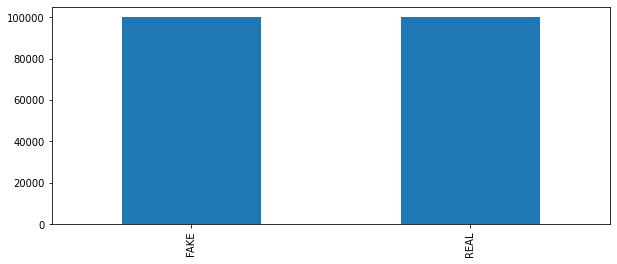

In [ ]:
my_labels = ['FAKE','REAL']
plt.figure(figsize=(10,4))
df.label.value_counts().plot(kind='bar');

In [ ]:
# Stopwords
stopwords = STOPWORDS
stopwords = list(stopwords)
STOPWORDS = nltk.corpus.stopwords.words('english')
stopwords = stopwords + STOPWORDS

In [ ]:
df_labels = df['label']
df_labels.head(20)

0  172712    FAKE
   3345      FAKE
   9557      FAKE
   138662    FAKE
   1220      FAKE
   210520    FAKE
   13344     FAKE
   170516    FAKE
   114955    FAKE
   145072    FAKE
   228103    FAKE
   56853     FAKE
   159774    FAKE
   134749    FAKE
   113476    FAKE
   195578    FAKE
   109886    FAKE
   84751     FAKE
   260137    FAKE
   251949    FAKE
Name: label, dtype: object

In [ ]:
fake_dataset = df[df.label == 'FAKE']
real_dataset = df[df.label == 'REAL']
fake_words = ' '
real_words = ' '

In [ ]:
# for words in fake_dataset.text:
#   tokens = nltk.word_tokenize(words)
#   for word in tokens:
#     fake_words = fake_words + word + " "

In [ ]:
# for words in real_dataset.text:
#   tokens = nltk.word_tokenize(words)
#   for word in tokens:
#     real_words = real_words + word + " "

In [ ]:
# def gen_wordcloud(wordcloud):
#     plt.figure(figsize = (10,8))
#     plt.imshow(wordcloud)
#     plt.tight_layout(pad=0)
#     plt.axis('off')
#     plt.show()

In [ ]:
# print("\t\t\t\t Fake WORDS")    
# wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
#                      max_words = 500, max_font_size = 50, random_state = 42).generate(fake_words)
# gen_wordcloud(wordcloud)

In [ ]:
# print("\t\t\t\t Real WORDS")
# wordcloud = WordCloud(background_color = 'white', width = 500, height = 500, stopwords = stopwords,
#                      max_words = 500, max_font_size = 50, random_state = 42).generate(real_words)
# gen_wordcloud(wordcloud)

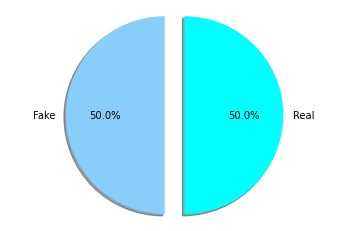

In [ ]:
count_Class = pd.value_counts(df.label, sort = True)

# Data to Plot
labels = 'Fake', 'Real'
sizes = [count_Class[0], count_Class[1]]
colors = ['lightskyblue', 'aqua']
explode = (0.1, 0.1)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [ ]:
X = df.text
y = df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [ ]:
# #Split the dataset
# X_train,X_test,y_train,y_test = train_test_split(df['text'].values.astype('str'), labels, test_size=0.2, random_state=7)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(140000,)
(60000,)


In [ ]:
# Dictionary of all words from train corpus with their counts.
words_counts = {}

from collections import Counter
words_counts = Counter([word for line in X_train for word in line.split(' ')])

# Sorting 
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:10]

# Top 10
most_common_words[:10]

[('', 124188),
 ('and', 44920),
 ('food', 23040),
 ('good', 21300),
 ('place', 19373),
 ('not', 18055),
 ('great', 16841),
 ('service', 9091),
 ('go', 8027),
 ('best', 7827)]

# Random Forest

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
# instead of doing these steps one at a time, we can use a pipeline to complete them all at once
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))

pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', RandomForestClassifier())])
# fitting our model and save it in a pickle for later use
model = pipeline.fit(X_train, y_train)
# with open('RandomForest.pickle', 'wb') as f:
#     pickle.dump(model, f)
ytest = np.array(y_test)
# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

              precision    recall  f1-score   support

        FAKE       0.80      0.95      0.87     29851
        REAL       0.94      0.77      0.84     30149

    accuracy                           0.86     60000
   macro avg       0.87      0.86      0.86     60000
weighted avg       0.87      0.86      0.86     60000

[[28269  1582]
 [ 7010 23139]]


# Naive Bayes classifier for multinomial models

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_labels))

accuracy 0.6787333333333333
              precision    recall  f1-score   support

        FAKE       0.67      0.71      0.69     29851
        REAL       0.69      0.65      0.67     30149

    accuracy                           0.68     60000
   macro avg       0.68      0.68      0.68     60000
weighted avg       0.68      0.68      0.68     60000

CPU times: user 2.85 s, sys: 3.99 ms, total: 2.85 s
Wall time: 2.86 s


# Linear support vector machine

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [ ]:
%%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_labels))

accuracy 0.5761666666666667
              precision    recall  f1-score   support

        FAKE       0.67      0.29      0.40     29851
        REAL       0.55      0.86      0.67     30149

    accuracy                           0.58     60000
   macro avg       0.61      0.57      0.54     60000
weighted avg       0.61      0.58      0.54     60000

CPU times: user 2.8 s, sys: 8.95 ms, total: 2.81 s
Wall time: 2.82 s


# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=

In [ ]:
%%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_labels))

accuracy 0.6935
              precision    recall  f1-score   support

        FAKE       0.68      0.72      0.70     29851
        REAL       0.71      0.67      0.69     30149

    accuracy                           0.69     60000
   macro avg       0.69      0.69      0.69     60000
weighted avg       0.69      0.69      0.69     60000

CPU times: user 3.34 s, sys: 68.7 ms, total: 3.41 s
Wall time: 3.36 s


# Word2vec embedding and Logistic Regression

Word2vec transforms a text into a row of numbers. Word2vec allows words with similar meaning to have similar vector representation. I used the pre-trained model by Google on a 100 billion word Google News corpus.

In [ ]:
%%time

wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)
wv.init_sims(replace=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


CPU times: user 1min 10s, sys: 8.53 s, total: 1min 19s
Wall time: 1min 52s


In [ ]:
list(islice(wv.vocab, 13030, 13050))

['Memorial_Hospital',
 'Seniors',
 'memorandum',
 'elephant',
 'Trump',
 'Census',
 'pilgrims',
 'De',
 'Dogs',
 '###-####_ext',
 'chaotic',
 'forgive',
 'scholar',
 'Lottery',
 'decreasing',
 'Supervisor',
 'fundamentally',
 'Fitness',
 'abundance',
 'Hold']

In [ ]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [ ]:
nltk.download('punkt')
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
train, test = train_test_split(df, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['text']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['text']), axis=1).values

In [ ]:
X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train['label'])
y_pred = logreg.predict(X_test_word_average)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print('accuracy %s' % accuracy_score(y_pred, test.label))
print(classification_report(test.label, y_pred,target_names=my_labels))

accuracy 0.60125
              precision    recall  f1-score   support

        FAKE       0.60      0.58      0.59     29851
        REAL       0.60      0.62      0.61     30149

    accuracy                           0.60     60000
   macro avg       0.60      0.60      0.60     60000
weighted avg       0.60      0.60      0.60     60000



# Doc2vec and Logistic Regression

word2vec can be extended to documents and this is a Doc2vec

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

In [ ]:
def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(gensim.models.doc2vec.TaggedDocument(v.split(), [label]))
    return labeled

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.label, random_state=0, test_size=0.3)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [ ]:
all_data[:2]

[TaggedDocument(words=['great', 'pizza'], tags=['Train_0']),
 TaggedDocument(words=['grill', 'cheese', 'tomato', 'soup', 'loved', 'never', 'bronx', 'pale', 'ale', 'came'], tags=['Train_1'])]

In [ ]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

100%|██████████| 200000/200000 [00:00<00:00, 2597084.22it/s]


In [ ]:
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 200000/200000 [00:00<00:00, 2813062.29it/s]


In [ ]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

In [ ]:
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [ ]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_dbow, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_labels))

accuracy 0.6062166666666666
              precision    recall  f1-score   support

        FAKE       0.61      0.59      0.60     29847
        REAL       0.61      0.62      0.61     30153

    accuracy                           0.61     60000
   macro avg       0.61      0.61      0.61     60000
weighted avg       0.61      0.61      0.61     60000



# BOW with keras

- Reference: https://github.com/tensorflow/workshops/blob/master/extras/keras-bag-of-words/keras-bow-model.ipynb

In [ ]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

In [ ]:
train_size = int(len(df) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(df) - train_size))

Train size: 140000
Test size: 60000


In [ ]:
train_texts = df['text'][:train_size]
train_labels = df['label'][:train_size]

test_texts = df['text'][train_size:]
test_labels = df['label'][train_size:]

In [ ]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [ ]:
tokenize.fit_on_texts(train_texts) # only fit on train
x_train = tokenize.texts_to_matrix(train_texts)
x_test = tokenize.texts_to_matrix(test_texts)

In [ ]:
encoder = LabelEncoder()
encoder.fit(train_labels)
y_train = encoder.transform(train_labels)
y_test = encoder.transform(test_labels)

In [ ]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [ ]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (140000, 1000)
x_test shape: (60000, 1000)
y_train shape: (140000, 2)
y_test shape: (60000, 2)


In [ ]:
batch_size = 32
epochs = 10

In [ ]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/10
3938/3938 [==============================] - 24s 6ms/step - loss: 0.4887 - accuracy: 0.7958 - val_loss: 1.4405 - val_accuracy: 0.0701
Epoch 2/10
3938/3938 [==============================] - 24s 6ms/step - loss: 0.4250 - accuracy: 0.8249 - val_loss: 1.3431 - val_accuracy: 0.2109
Epoch 3/10
3938/3938 [==============================] - 25s 6ms/step - loss: 0.3403 - accuracy: 0.8669 - val_loss: 1.2500 - val_accuracy: 0.3264
Epoch 4/10
3938/3938 [==============================] - 23s 6ms/step - loss: 0.2729 - accuracy: 0.8961 - val_loss: 1.1742 - val_accuracy: 0.4013
Epoch 5/10
3938/3938 [==============================] - 23s 6ms/step - loss: 0.2294 - accuracy: 0.9146 - val_loss: 1.1568 - val_accuracy: 0.4440
Epoch 6/10
3938/3938 [==============================] - 28s 7ms/step - loss: 0.2005 - accuracy: 0.9262 - val_loss: 1.1448 - val_accuracy: 0.4779
Epoch 7/10
3938/3938 [==============================] - 24s 6ms/step - loss: 0.1779 - accuracy: 0.9350 - val_loss: 1.1056 - val_ac

In [ ]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

1875/1875 [==============================] - 6s 3ms/step - loss: 1.1146 - accuracy: 0.5469
Test accuracy: 0.5469333529472351


In [ ]:
# Here's how to generate a prediction on individual examples
text_labels = encoder.classes_ 

for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_labels.iloc[i][:50], "...")
    print('Actual label:' + test_labels.iloc[i])
    print("Predicted label: " + predicted_label + "\n")

REAL ...
Actual label:REAL
Predicted label: FAKE

REAL ...
Actual label:REAL
Predicted label: FAKE

REAL ...
Actual label:REAL
Predicted label: REAL

REAL ...
Actual label:REAL
Predicted label: REAL

REAL ...
Actual label:REAL
Predicted label: FAKE

REAL ...
Actual label:REAL
Predicted label: REAL

REAL ...
Actual label:REAL
Predicted label: REAL

REAL ...
Actual label:REAL
Predicted label: FAKE

REAL ...
Actual label:REAL
Predicted label: FAKE

REAL ...
Actual label:REAL
Predicted label: FAKE



In [ ]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [ ]:
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


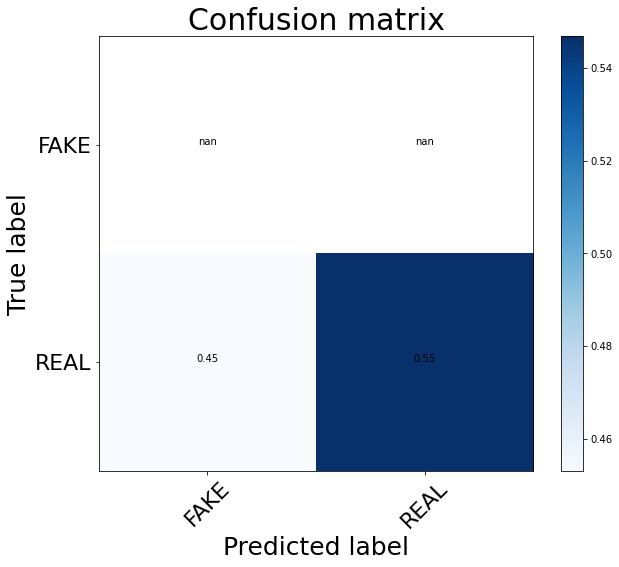

In [ ]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

# Sentiment Analysis

In [ ]:
from textblob import TextBlob

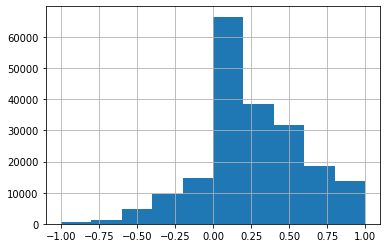

In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity_score']=df['text'].\
   apply(lambda x : polarity(x))
df['polarity_score'].hist()

<BarContainer object of 3 artists>

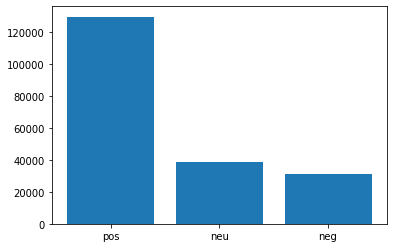

In [ ]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
df['polarity']=df['polarity_score'].\
   map(lambda x: sentiment(x))

plt.bar(df.polarity.value_counts().index,
        df.polarity.value_counts())

In [ ]:
df[df['polarity']=='pos']['text'].head()

0  9557      recently visited pylos new york business and f...
   138662    buddy brought and definitely enjoyed pizza doe...
   1220                        adds atmosphere staff friendly 
   170516    overall wait staff pleasurable and food tasty ...
   145072                       going make excuses   taht good
Name: text, dtype: object

In [ ]:
df[df['polarity']=='neg']['text'].head()

0  172712                                        not unique d 
   210520      oh love chicken cous cous definitely favourite 
   251949    portions small and food expensive bbq   sure e...
   178254                    sadly service left really unhappy
   232520        guess thats expected something truffle taste 
Name: text, dtype: object